# 実践問題3 Y=aX+b の期待値と分散

## (1) 確率変数Yの期待値と分散

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

In [2]:
n = 1000  # シミュレーションのサンプルサイズ
loc = 37/10
scale = 201/100
X = np.random.normal(loc=loc, scale=scale, size=n)

In [3]:
# Xの標本平均、標本分散、ヒストグラム
meanX = np.mean(X)
varX = np.var(X)
print('mean={}, var={}'.format(meanX, varX))

mean=3.6939687343252436, var=3.9770351423732846


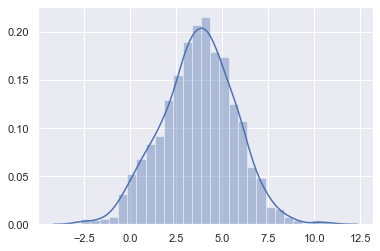

In [4]:
sns.distplot(X);

In [5]:
def qqplot(dist):
    stats.probplot(dist, dist="norm", plot=plt)
    plt.show()

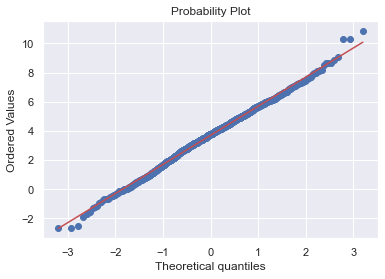

In [6]:
# 正規性を見るためのQ-Qプロット
qqplot(X)

In [7]:
# Yの標本平均、標本分散、ヒストグラム
Y = 10*(X-3)
meanY = np.mean(Y)
varY = np.var(Y)
print('mean={}, var={}'.format(meanY, varY))


mean=6.939687343252432, var=397.7035142373284


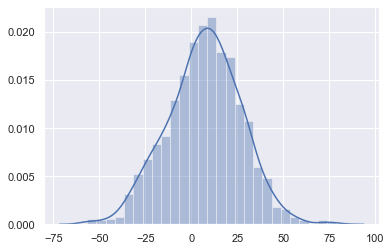

In [8]:
sns.distplot(Y);

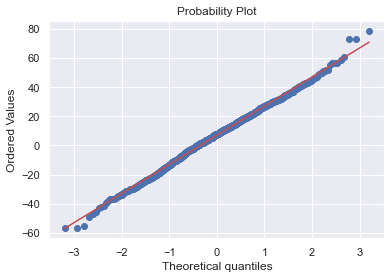

In [9]:
# 正規性を見るためのQ-Qプロット
qqplot(Y)

## (2) 確率変数Zの期待値と分散

In [10]:
# インタラクティブにグラフを描画するUIを作ってみる
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
def f(myu, sigma):
  Z = (X-myu)/sigma
  meanZ = np.mean(Z)
  varZ = np.var(Z)
  print('mean={}, var={}'.format(meanZ, varZ))

  plt.xlim(-10, 10)  
  plt.hist(Z)
  plt.show;
  return

mean=3.6939687343252436, var=3.9770351423732846


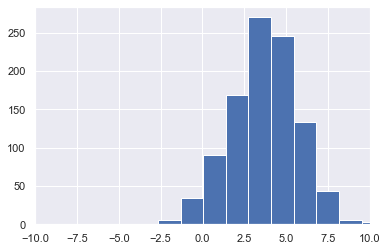

In [12]:
interact(f, myu=(-7.0,7.0,0.1), sigma=(0.0,2.0,0.1));

## extra

### 1.実践問題の初期設定で、X^2のときの期待値と分散を求めよ。また、数値シミュレーションした際の分布を描け。

In [13]:
X2=X**2
meanX2 = np.mean(X2)
varX2 = np.var(X2)
print('mean={}, var={}'.format(meanX2, varX2))

mean=17.62244015254572, var=240.27637414911314


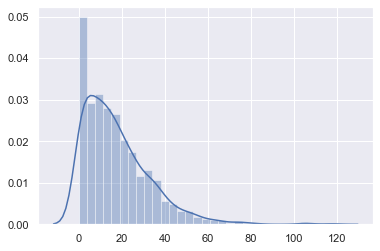

In [14]:
sns.distplot(X2);

### 2.XをZに変換したときのZ^2の期待値と分散を求めよ。また、数値シミュレーションした際の分布を描け。

Xから標本平均、標本分散を引くと、標準正規分布になる。

In [16]:
Zn = (X-meanX)/varX
meanZn = np.mean(Zn)
varZn = np.var(Zn)
print('mean={}, var={}'.format(meanZn, varZn))

mean=-1.0702549957386509e-16, var=0.251443591570391


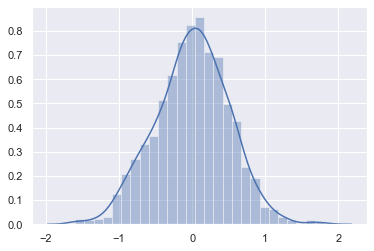

In [17]:
sns.distplot(Zn);

Z^2の期待値と分散

In [19]:
Zn2 = Zn**2
meanZn2 = np.mean(Zn2)
varZn2 = np.var(Zn2)
print('mean={}, var={}'.format(meanZn2, varZn2))

mean=0.251443591570391, var=0.13525303049313045


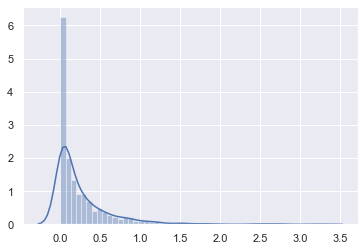

In [20]:
sns.distplot(Zn2);

0付近に集まる

### 3.それぞれ独立に標準正規分布に従う確率変数X_1,X_2,X_3, ... ,X_iがあるとき、i=1,2,3のときのそれぞれのΣX_i^2 の期待値と分散を求めよ。また、数値シミュレーションした際の分布を描け。

In [31]:
N = 1000  # X_iの個数
n = 500   # 各X_iに含まれるサンプルサイズ
loc = 0.0
scale = 1.0
Xi = np.random.normal(loc=loc, scale=scale, size=(N,n))
Xi2 = Xi**2

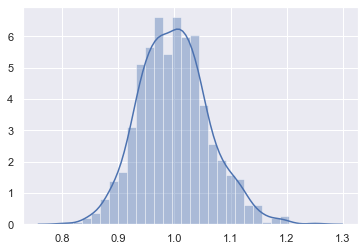

In [34]:
meanXi2 = np.mean(Xi2, axis=1)
sns.distplot(meanXi2);

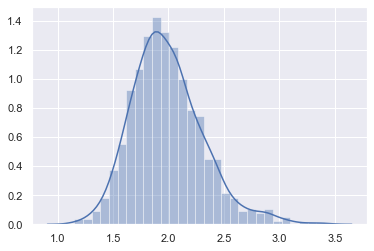

In [36]:
varXi2 = np.var(Xi2, axis=1)
sns.distplot(varXi2);

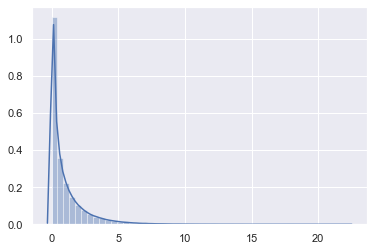

In [37]:
sns.distplot(Xi2);